In [1]:
import pandas as pd
from preprocessing import Preprocessor
from network import RNN

In [2]:
pp = Preprocessor(train_path="datasets/no1_train.csv", val_path="datasets/no1_validation.csv")
train_df, val_df = pp.preprocess()

In [3]:
seq_len = 36
X_feat = ["hydro", "micro", "thermal", "wind", "river", "total", "sys_reg", "flow", "time_of_hour_sin", "time_of_hour_cos", "time_of_day_sin", "time_of_day_cos", "time_of_week_sin", "time_of_week_cos", "time_of_year_sin", "time_of_year_cos", "y_24h", "y_yesterday", "y_prev"]
num_feat = len(X_feat)
rnn = RNN(seq_len=seq_len, num_feat=num_feat)

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-04-24 16:23:39.719106: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-24 16:23:39.723971: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-24 16:23:39.728268: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
train_X = pp.df_to_x(train_df[X_feat], seq_len=seq_len)
train_Y = pp.df_to_y(train_df["y"], seq_len=seq_len)
val_X = pp.df_to_x(val_df[X_feat], seq_len=seq_len)
val_Y = pp.df_to_y(val_df["y"], seq_len=seq_len)

In [5]:
# Maybe change batch_size to make training go faster
rnn.train_model(train_X,
                train_Y,
                validation_data=(val_X, val_Y),
                epochs=3,
                batch_size=32)

# rnn.load_model("models/model_seq144_epochs10_batch32")

Epoch 1/3


2022-04-24 16:23:46.298502: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-24 16:23:46.700879: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-24 16:23:47.001743: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-24 16:23:47.408787: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-24 16:23:47.805088: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


7023/7023 [==============================] - ETA: 0s - loss: 0.0097

2022-04-24 16:32:42.637419: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-24 16:32:42.770879: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-24 16:32:42.980240: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


7023/7023 [==============================] - 563s 80ms/step - loss: 0.0097 - val_loss: 0.0127
Epoch 2/3
7023/7023 [==============================] - 553s 79ms/step - loss: 0.0053 - val_loss: 0.0130
Epoch 3/3
7023/7023 [==============================] - 568s 81ms/step - loss: 0.0049 - val_loss: 0.0131


2022-04-24 16:51:51.742204: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: models/model_seq72_epochs3_batch32/assets


INFO:tensorflow:Assets written to: models/model_seq72_epochs3_batch32/assets


/Users/anmolsingh/OneDrive - NTNU/v22/Deep_Learning/time-series-forecasting/venv/lib/python3.8/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


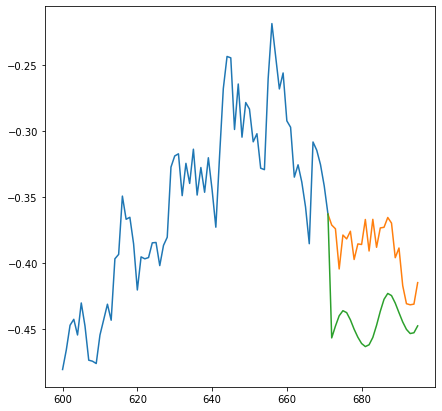

In [13]:
rnn.predict_ahead(x=val_X, y=val_Y, start=600, steps_ahead=24)